In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import seaborn as sns; sns.set()  # for plot styling

%matplotlib inline

## 1. Implement a clustering algorithm to consistently group together the points, justifying your choices.

In [99]:
df=pd.read_csv('pts.csv',header=None)

In [100]:
df

,0,1
0,0.075220,-0.134484
1,-0.010374,-0.195679
2,0.090225,0.141263
3,0.117467,0.081682
4,-0.152645,0.042330
...,...,...
290,1.256085,-0.392341
291,0.834709,-1.591002
292,-1.132788,-1.069974
293,-0.399481,1.897967


In [101]:
df.dropna(axis=0,how='any',subset=[0,1],inplace=True)

In [102]:
# Variable with the Longitude and Latitude
X=df.loc[:,[0,1]]

In [103]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[[0]]
X_axis = df[[1]]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


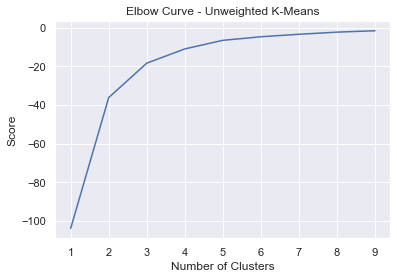

In [104]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve - Unweighted K-Means')

plt.show()

## Using Elbow Plot we can see that 3 is a ideal choice of cluster here

Text(0.5, 1.0, 'Co-ordinates')

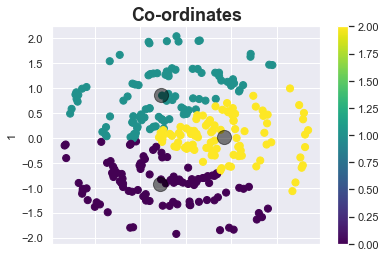

In [105]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.


X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[0:2]]) # Labels of each point

#Visualise Resutls
X.plot.scatter(x = 0, y =1, c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Co-ordinates',fontsize=18, fontweight='bold')

# Hierarchy Clustering

In [107]:
X = df.iloc[:, [0, 1]].values

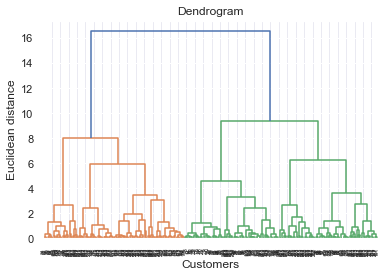

In [108]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

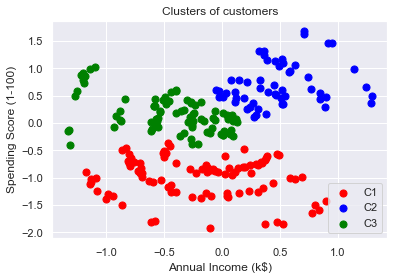

In [110]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'C1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'C2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'C3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'C4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'C5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()